
### 1. Start a ChatBot session to understand what a *Classification Decision Tree* is: (a) ask the ChatBot to describe the type of problem a *Classification Decision Tree* addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a *Classification Decision Tree* makes *(classification) predictions* versus how *Multiple Linear Regression* makes *(regression) predictions*

A classification tree is a machine learning model used to classify data points into categories based on their features. In a sense, it's *like* regression but for categorical data, which is why it's sometimes referred to as logistic regression (even though it's not regression). It represents decisions and their possible consequences as a tree-like structure, where each internal node tests a specific feature, each branch represents an outcome of the test, and each leaf node corresponds to a class label (the predicted category). In a decision tree, there are **root nodes** which is the top part of the tree and where everything splits off from, **internal nodes** that represent tests or decisions based on feature values, **branches** which are paths from one node to another representing the outcomes of the tests, and **leaf nodes** which are terminal nodes that assign a class label. 

Classification are used to solve classification problems, where the goal is to assign data points into discrete categories or classes based on their features. They're used to predict a categorical target variable (dependent) based on one or more predictors. An example would be a medical diagnosis where we want to classify/predict whether a patient has a certain disease based on features such as age, symptoms, and medical history. A classification tree helps by systematically making decisions based on the values of these features to arrive at a diagnosis. We first collect the data for our dependent (disease we're trying to diagnose) and independents (health factors), then build a decision tree where its trained on the data. During training, the algorithm tries to find the best splits (decision points) in the data based on the features. These splits are made to maximize the accuracy of predicting the target disease class...This is different from regression since regression uses a continuous outcome while this is categorical, and the goal of regression is the predict a specific numerical value while classification just assigns the data to one of several classes. In this example, classification diagnoses a disease while regression would predict a patient's blood pressure. Classification solves problems where the goal is to predict a category or class label based on predictors whereas regression solves problems where the goal is to preidct a continuous numerical value.

### 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following *metrics* below: provide your answers and, in your own words, *concisely explain your rationale for your answers.*<br>


1. **Accuracy** measures the proportion of true results (both true positives and true negatives) in the population.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
    
2. **Sensitivity** measures the proportion of actual positives that are correctly identified.

$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

3. **Specificity** measures the proportion of actual negatives that are correctly identified.

$$\text{Specificity} = \frac{TN}{TN + FP}$$

4. **Precision** measures the proportion of positive identifications that were actually correct.

$$\text{Precision} = \frac{TP}{TP + FP}$$

> We use the **accuracy** metric when we have balanced classes and equal importance of errors. **Sensitivity** is useful to minimize false negatives, **specificity** minimizes false positives, and **precision** minimizes false negatives. Precision and sensitivity metrics are better for imbalanced datasets.

- **Accuracy**: Total percentage of the time we get a correct prediction (isn't reliable for imbalanced data; suppose you have spam email dataset where 1% of emails are spam and 99% aren't. If we made model to predict no emails or spam, 99% of time model is correct but it's predicting no spam email)
- **Sensitivity**: The count of true positives over all positives (percentage of the positive class that the model is able to identify)
- **Specificity**: Number of true negatives over all negatives (measures the correct identification of negatives)
- **Precision**: Of the times that the model predicted someone to have a positive, how often was that actually the case?

1. The accuracy metric measures how often the model is correct overall and is better for scenarios where the dataset is balanced. Let's say we have an image classification scenario where the goal is to classify whether the image is of a UofT or UWaterloo student. Assume that the dataset holds an equal amount of images for each student, so if the model correctly classifies 20 out of 100 images, then the accuracy is 20%. Oftentimes, the accuracy metric is used to compare 2 models to see which is more accurate instead of a real-world scenario since it is rare for the dataset to be balanced, an exception being scenarios with a 50/50 chance split.  

2. A medical diagnosis would be an appropriate scenario for the sensitivity metric since, in the case of trying to detect a disease, you want to minimize the amount of false negatives so that you don't miss any ill patients. You want to catch as many true positives as possible even if it means there are false positives weeded into it since it is better to have a pointless checkup than to have none when there might actually be something wrong. Missing a patient who actually has a disease is more dangerous than incorrectly diagnosing someone who doesn't.

3. The case where a credit card fraud detection system wants to detect whether there is fraud or not, is the perfect example of using the specificity metric. This metric measures the proportion of actual negatives that are correctly identified which in this scenario, would be best because you want to be sure that there is no fraud happening on the credit card. We want to minimize false positives because the hassle of reporting fraud takes a long time and is costly, so we always want to be sure that the true negative proportion is very high.

4. We want to pay attention to high precision in the case where someone may have diabetes for example, since we want an accurate prediction model. High precision reduces the risk of false positives so if we accurately predict that someone may have diabetes, then we can avoid misdiagnosing someone and making them go through unneeded and expensive treatment and tests.  

### 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard *exploratory data analysis (EDA)* and data summarization after pre-processing the dataset to meet the requirements below<br>

 1. remove `Weight_oz`, `Width`, and `Height` 
 2. drop all remaining rows with `NaN` entries 
 3. set `Pub year` and `NumPages` to have the type `int`, and `Hard_or_Paper` to have the type `category`

In [3]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

del ab['Weight_oz']
del ab['Width']
del ab['Height']
# or you could use ab.drop(columns=['Weight_oz', 'Width', 'Height'], inplace=True)
# to remove multiple columns from ab at once

ab_reduced_noNaN = ab.dropna() 
# don't say ab.dropna(inplace=True) cuz then that would modify ab but we want a
# new variable ab_reduced_noNaN that holds this so no inplace=True means we keep ab unchanged and create a new df 

new_dtypes = {
    'Pub year': int,
    'NumPages': int,
    'Hard_or_Paper': "category"
}
ab_reduced_noNaN = ab_reduced_noNaN.astype(new_dtypes)
ab_reduced_noNaN

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304,Adams Media,2010,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273,Free Press,2008,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96,Dover Publications,1995,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672,Harper Perennial,2008,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720,Knopf,2011,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192,HarperCollins,2004,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160,Worth Publishers,2011,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224,St Martin's Griffin,2005,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480,W. W. Norton & Company,2010,393934942,0.9


### 4. Create an 80/20 split with 80% of the data as a training set *ab_reduced_noNaN_train* and 20% of the data testing set  *ab_reduced_noNaN_test* using either *df.sample(...)* as done in TUT or using *train_test_split(...)* as done in the previous HW, and report on how many observations there are in the training data set and the test data set.<br><br>Tell a ChatBot that you are about to fit a "scikit-learn" *DecisionTreeClassifier* model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree *clf* using only the *List Price* variable to predict whether or not a book is a hard cover or paper back book using a *max_depth* of *2*; finally use *tree.plot_tree(clf)* to explain what *predictions* are made based on *List Price* for the fitted *clf* model

```python
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]
```

> y creates a binary variable so 1 indicates hard and 0 indicates paper.
x is the predictor variable and it uses List Price to predict whether the outcome is hard or paper. So x contains the 'List Price' column which will be the feature that the DecisionTreeClassifier uses to predict whether the product is hard or paper

In [4]:
np.random.seed(77)
ab_reduced_noNaN_train, ab_reduced_noNaN_test = \
  train_test_split(ab_reduced_noNaN, train_size=0.8)

In the training dataset, there are 255 observations (rows) and in the testing there is 64.

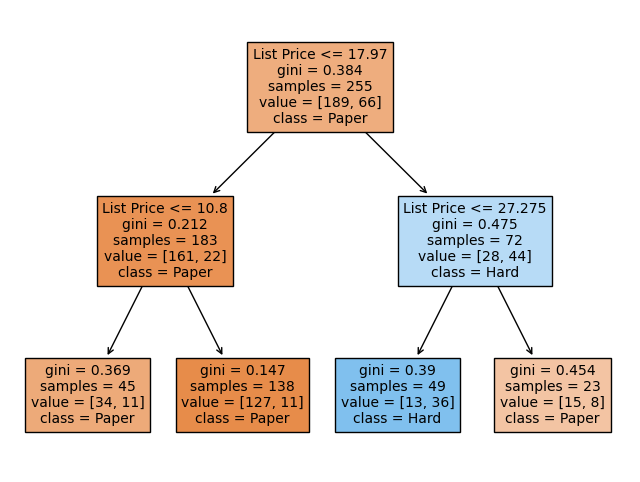

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(8, 6))
plot_tree(clf, feature_names=['List Price'], class_names=['Paper', 'Hard'], filled=True)
plt.show()

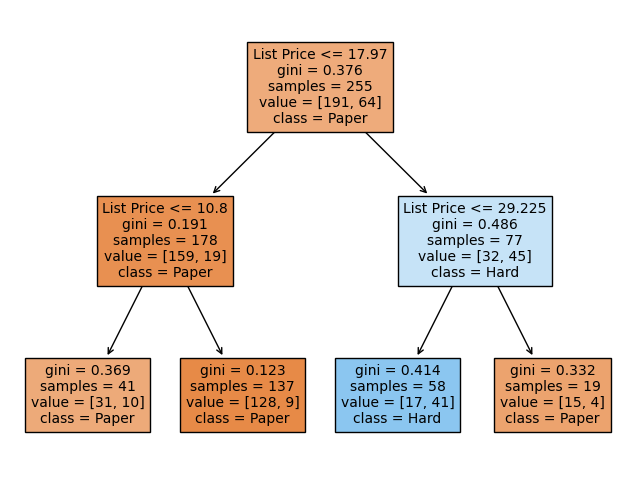

In [8]:
X_train = ab_reduced_noNaN_train[['List Price']]  # Feature for training
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # Target for training

X_test = ab_reduced_noNaN_test[['List Price']]  # Feature for testing
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # Target for testing

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(8, 6))
plot_tree(clf, feature_names=['List Price'], class_names=['Paper', 'Hard'], filled=True)
plt.show()


Above are 2 decision trees, the first one uses the original dataset and the second one uses the 80/20 training testing dataset. We often use the training-testing dataset over the original because the train-test set helps evaluate a model's ability to generalize to new data. Essentially, the tree is trained on the *ab_reduced_noNaN_train* by allowing the model to learn patterns and then *ab_reduced_noNaN_train* is used to evaluate the model's accuracy or other metrics on new data. If we only used the original dataset, then it may lead to perfect classification because it's being trained and tested on the same dataset so it might've already seen the patterns in testing as it could've been trained on the same data, making it hard to detect overfitting.

I'll explain the predictions made off of the train-test decision tree since it is more accurate than the original one. When $List Price \leq 17.97$, then it's likely that the book is paper, but we can be more specific and say that when $List Price \leq 10.8$, the book is truly paper since both leaf nodes are of paper class. However, when $10.8 < List Price \leq 29.225$, the book could either be hard or paperback depending on other characteristics. That means that in this price range, the book type can't be classified by *ListPrice* alone, but with the help of other features. Essentially, this decision tree is predicting that the cheaper the book is, the more likely it is to be paperback and more expensive books means it could either be hardback or paperback.

### 5. Repeat the previous problem but this time visualize the *classification decision tree* based on the following specifications below; then explain generally how predictions are made for the *clf2* model<br>

1. `X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]`
2. `max_depth` set to `4`

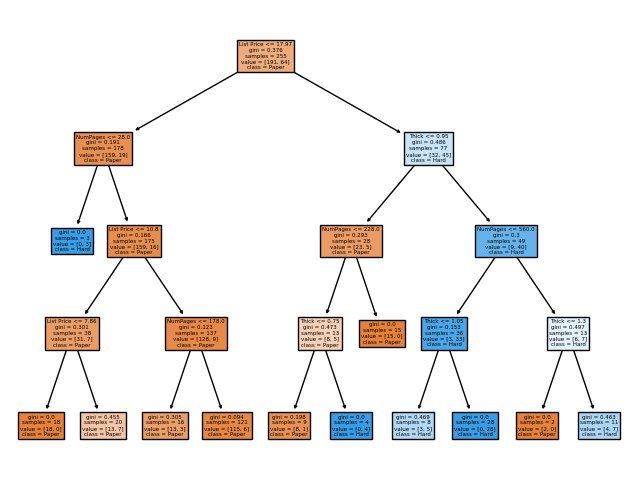

In [19]:
X_train = ab_reduced_noNaN_train[['List Price', 'NumPages', 'Thick']]  # Feature for training
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']  # Target for training

X_test = ab_reduced_noNaN_test[['List Price', 'NumPages', 'Thick']]  # Feature for testing
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # Target for testing

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

plt.figure(figsize=(8, 6))
plot_tree(clf2, feature_names=['List Price', 'NumPages', 'Thick'], class_names=['Paper', 'Hard'], filled=True)
plt.show()

Predictions are made from seeing which datapoints fall under or over the List Price's value and also separating them by NumPages and Thick to really determine whether a book is hard or paper. For example, NumPages is a feature which may be relevant since harder cover books tend to be longer and thickenss of book would relate to the book's binding type since hardcover books are usually thick. The model will keep evaluating each variable to narrow down whether a book is hard or paper based on some features and will stop after 4 rounds since that's what our depth is. 

### 6. Use previously created *ab_reduced_noNaN_test* to create confusion matrices for *clf* and *clf2*. Report the sensitivity, specificity and accuracy for each of the models

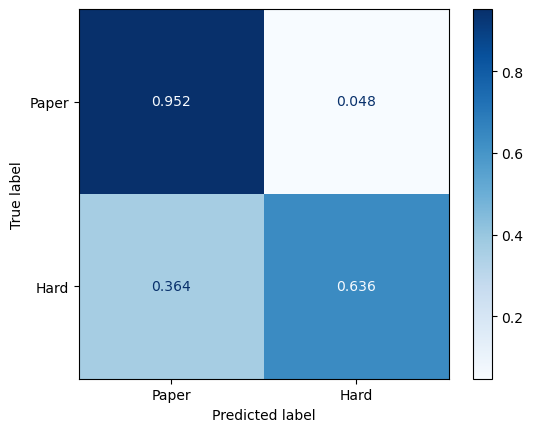

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Extract features and true labels from the test dataset
X_test = ab_reduced_noNaN_test[['List Price']]  # Features for testing
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # True labels

# Use the trained classifier to predict labels
y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')  # Normalized matrix

# Display the confusion matrix with 3 decimal places
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Paper", "Hard"])
disp.plot(cmap="Blues", values_format=".3f")  # Format values to 3 decimal places

In the case of this dataset, hard cover is referred to as the positive and paper to be the negative. So true positive would mean that the model predicted hard and got hard. So TP=0.636, FP=0.048, TN=0.952, FN=0.364. Calculating the metrics, I get that **sensitivity=0.636, specificity=0.952, accuracy=0.794**.

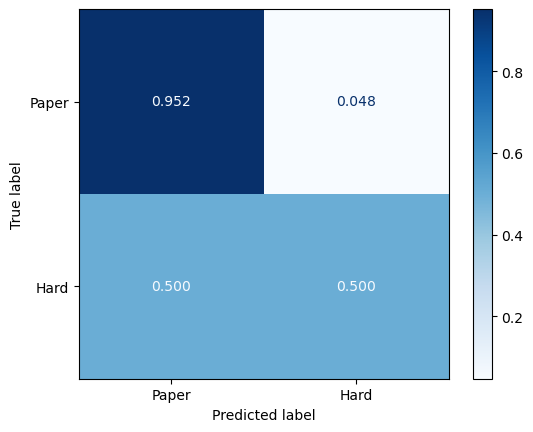

In [24]:
X_test = ab_reduced_noNaN_test[['List Price', 'NumPages', 'Thick']]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Use the trained classifier to predict labels
y_pred = clf2.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')  # Normalized matrix

# Display the confusion matrix with 3 decimal places
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Paper", "Hard"])
disp.plot(cmap="Blues", values_format=".3f")  

We know that TP=0.5, FP=0.048, TN=0.952, FN=0.5. So **sensitivity= 0.5, specificity= 0.952, accuracy= 0.726**.

### 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for *clf* and *clf2*) are better<br>

```python
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
```

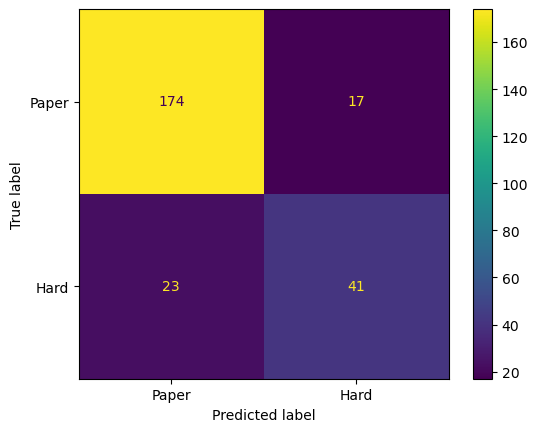

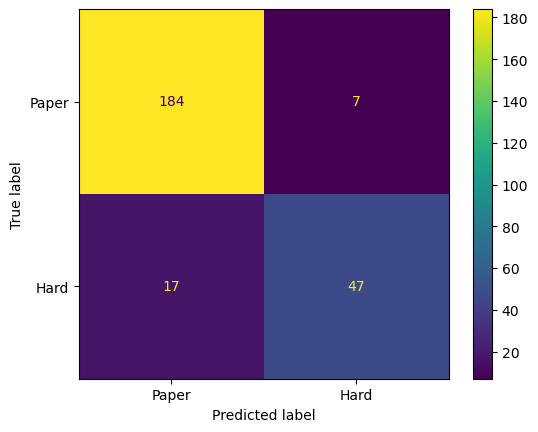

In [43]:
ConfusionMatrixDisplay(
    confusion_matrix(y_train, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(y_train, 
                     clf2.predict(
                         ab_reduced_noNaN_train[['List Price', 'NumPages', 'Thick']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

The difference between these confusion matrices and the ones in question 6 is that these matrices use the training dataset while the other uses the testing. It's generally better to use the testing dataset so we can avoid overfitting by working with data that the model hasn't seen before, which simulates a real-world scenario/data. The matrices derived from the training set are already familiar with the data which can lead to it giving midleadingly high metrics since it could've possibly memorized the data while it was training. The testing set matrices provide a more accurate reflection of it's performance on real-world data since in an actual scenario, you would be introduced to unseen data instead of data you've already seen before.


### 8. Read the paragraphs in *Further Guidance* and ask a ChatBot how to visualize *feature Importances* available for *scikit-learn* *classification decision trees*; do so for *clf2*;  and use *.feature_names_in_* corresponding to *.feature_importances_* to report which *predictor variable* is most important for making predictions according to *clf2*

**Feature importance** is a technique used to evaluate the contribution of each feature (or variable) in a machine learning model, particularly in decision trees and ensemble methods like random forests and gradient boosting. For decision trees, it indicates how valuable each feature is in predicting the target variable. Features with higher importance contribute more to the decision-making process of the model, while those with lower importance have less influence.

In [48]:
# Get the feature importances
# Returns an array of importance scores, one for each feature
importances = clf2.feature_importances_

# Get the feature names
feature_names = clf2.feature_names_in_

# Create a DataFrame to display the feature importances with their corresponding feature names
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important feature
print(feature_importance_df)

      Feature  Importance
0  List Price    0.462371
2       Thick    0.367279
1    NumPages    0.170350


According to the feature importance code, *List Price* has a high importance value which means that it contributes the most in predicting the outcome variable.

### 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences

Linear regression coefficients quantify the change in the target variable for one-unit change in the predictor variable, while decision tree feature importance measures how much each feature contributes to reducing uncertainty (impurity) at each decision point in the tree; they both show the change in the outcome variable in some sense. So coefficients show the magnitude and direction of the relationship between each predictor and outcome, positive means the predictor increases the outcome and negative means it decreases it. Feature importances indicate how important each feature is for splitting the data and making decisions in the tree, higher importance value means the feature contributes more to reducing impurity and lower means it contributes less. Linear regression only gives direct quantitative relationships while decision trees rank features by their predictive important without specifying exact relationships. 

### 10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

perhaps

## ChatBot Links and Summaries
### Question 1-2

(https://chatgpt.com/share/673d610f-2690-8002-b94e-a84c2f6818ae)

1. **Classification Decision Trees**:
   - A **classification decision tree** is a machine learning algorithm that splits data into subsets based on the most significant features to predict a categorical outcome (e.g., whether a patient has a disease or not).
   - It addresses problems where the goal is to classify data into distinct categories based on input features.

2. **Metrics (Accuracy, Sensitivity, Specificity, Precision)**:
   - **Accuracy** measures the proportion of correct predictions (true positives and true negatives) out of all predictions. It's most useful in **balanced datasets** where both positive and negative classes are equally represented.
   - **Sensitivity** (or Recall) measures how well the model detects the positive class, while **Specificity** measures how well it identifies the negative class.
   - **Precision** tells you the proportion of true positives out of all predicted positives. It's important when false positives are costly, such as in fraud detection, spam classification, or medical diagnosis.
   - **Specificity** is useful when you want to minimize false positives, like in fraud detection, where false alarms can cause inefficiencies and customer dissatisfaction.

3. **Real-World Scenarios**:
   - **Fraud detection**: A high specificity ensures that legitimate transactions are not wrongly flagged as fraudulent, avoiding the hassle and costs of false positives.
   - **Spam email detection**: High precision ensures that when an email is flagged as spam, it is likely to be spam, preventing legitimate emails from being lost in the spam folder.
   - **Diabetes diagnosis**: Precision is important to avoid falsely diagnosing healthy individuals as diabetic, which could lead to unnecessary treatment and patient anxiety.
   - **Image classification**: Accuracy works well for balanced datasets, like a task where the goal is to classify images of cats vs. dogs, and false positives and false negatives have similar consequences.

4. **Best Use of Accuracy**:
   - **Accuracy** is best used in **balanced datasets** where the costs of false positives and false negatives are relatively equal. For example, in a balanced classification task like distinguishing between cats and dogs, accuracy is a good overall measure of performance.

### Question 3
no chatbot since i just used my stats notes where i wrote how we did this code previously

### Question 4

(https://chatgpt.com/share/673e5e65-c694-8002-b808-cdab458e9348)

1. **Decision Tree Basics**:
   - We discussed how **decision trees** make predictions, focusing on the idea of **splitting nodes** based on features (like **ListPrice**) to create **leaf nodes** with final predictions (e.g., **paperback** or **hardback**).
   - The **best split** in a decision tree is chosen by maximizing the **reduction in Gini impurity**, not by minimizing the impurity of individual nodes. It uses a weighted average of the child nodes' impurity to decide the best split.

2. **Interpreting Decision Tree Predictions**:
   - You explained a scenario where the decision tree predicts **paperback** for books with a **ListPrice ≤ 10.8** and **hardback** for books with a **ListPrice > 10.8**.
   - If the **ListPrice** is between 10.8 and 27.275, the model predicts both **hardback** and **paperback**, depending on further splits.
   - In general: **Lower ListPrice** → higher chance of **paperback** and **higher ListPrice** → higher chance of **hardback**.

3. **How Decision Trees Work**:
   - We discussed how **internal nodes** summarize predictions based on class distribution, while **leaf nodes** give the final class prediction.
   - Decision trees work by making splits at internal nodes to reduce impurity (like Gini), and this process is repeated until a stopping criterion is met.

4. **Gini Impurity and Splitting**:
   - We talked about **Gini impurity** as a measure of how mixed the classes are at each node and how the tree aims to **maximize Gini gain** (the reduction in impurity) with each split.

5. **Understanding Predictions**:
   - You learned how to interpret the predictions of a decision tree by following the splits and understanding the class distribution at each leaf. A tree's structure can reveal trends like how **price** influences whether a book is **hardback** or **paperback**.

### Question 5
didn't use chatbot since it was just copy and pasting question 4's code and changing a few variables

### Question 6-7

(https://chatgpt.com/share/673e5e30-5264-8002-8134-47e6011eee6d)

1. **Confusion Matrix with 3 Decimal Places**:
   - We discussed how to create a confusion matrix with **3 decimal places** using the `confusion_matrix` and `ConfusionMatrixDisplay` functions from `sklearn`. You can normalize the matrix by row, and format the values to show 3 decimal places using `values_format=".3f"`.

2. **Using `ab_reduced_noNaN_test`**:
   - I provided code to create the confusion matrix using `ab_reduced_noNaN_test` with the classifier `clf2`. This included extracting the true labels (`y_test`) and predicting labels (`y_pred`), followed by generating the confusion matrix and displaying it with 3 decimal places.

3. **Why Testing Dataset is Preferred for Confusion Matrices**:
   - We discussed why it's better to use the **test set** rather than the **training set** to generate confusion matrices:
     - The **test set** reflects the model's ability to generalize to unseen data.
     - Using the **training set** can lead to overoptimistic performance due to overfitting.
     - The **test set** provides a more honest measure of how the model will perform in real-world scenarios.

### Question 8-9

(https://chatgpt.com/share/673e6501-f208-8002-97e1-404c978ec195)

- **Feature Importances in Decision Trees**: We discussed how decision trees measure feature importance by evaluating how well each feature reduces impurity during splits. The more a feature helps in making predictions, the higher its importance.

- **Interpreting Coefficients vs. Feature Importances**:
  - **Linear regression coefficients** quantify the direct relationship between features and the target, indicating how each feature increases or decreases the target.
  - **Feature importances in decision trees** show the relative contribution of each feature to reducing uncertainty in predictions but don’t provide a direct quantitative relationship with the target.

- **Code for Visualizing Feature Importance**: We went over how to use `feature_importances_` and `feature_names_in_` from a trained decision tree model to visualize which feature is most important.